# Optimization of the original letter frequencies program
Here we explore the data created by our benchmark. So first we will read the CSV file generated by our benchmark.

In [3]:
# !py -m pip install pandas
# !py -m pip install numpy
# !py -m pip install matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read the time data
data = pd.read_csv('../time_data/multiple_run_real_times_new.csv')
data

,init,tally,print
0,0.1176,20.6794,2.4807
1,0.0995,20.8112,2.4210
2,0.1003,20.8782,2.4151
3,0.1015,20.7395,2.4319
4,0.1012,20.6397,2.5238
...,...,...,...
495,0.0877,20.6392,2.7908
496,0.0724,20.5223,2.2716
497,0.0795,20.5572,2.7873
498,0.0887,20.6568,2.2148


## Explore the data

In [4]:
data.shape

(500, 3)

In [5]:
data.describe()

,init,tally,print
count,500.000000,500.000000,500.000000
mean,0.098083,20.720719,2.496320
std,0.022017,0.220685,0.199673
min,0.067500,20.463300,2.047300
25%,0.084300,20.607075,2.351650
50%,0.097700,20.665000,2.470650
75%,0.105725,20.761475,2.624750
max,0.401600,22.374100,3.355500


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   init    500 non-null    float64
 1   tally   500 non-null    float64
 2   print   500 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


## Show a histogram

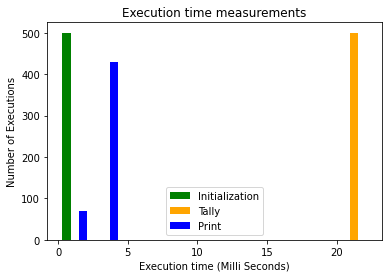

In [7]:

#data.hist()
plt.hist([data.init, data.tally, data.print], align=('mid'), color=['green', 'orange', 'blue'], label=['Initialization','Tally','Print'])
plt.title("Execution time measurements")
plt.xlabel("Execution time (Milli Seconds)")
plt.ylabel("Number of Executions")
plt.legend()

plt.show()



As it is visible from the histogram above, it's the tally algoritm takes remakably less time than it did before the optimization. Futher analysis will tell how much. 

count    500.000000
mean      23.315123
std        0.346686
min       22.725200
25%       23.109550
50%       23.254200
75%       23.425975
max       25.325000
dtype: float64


<AxesSubplot:>

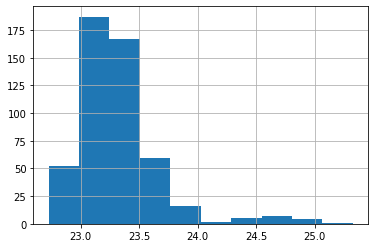

In [8]:
full_time = data.init + data.tally + data.print
print(full_time.describe())
full_time.hist()

It is now visible that most of the execution times lie around the mean, witch was calculated to (0.098083 + 20.720719 + 2.496320) = 23.315122. We can also see that the times "spread" out a lot less, witch is also visible from the std. dev. of just 0.346686 ms. on the combined times. 

To find out much time each part of the program is responsible for, we've plottet a pie chart of the different parts of the program. 

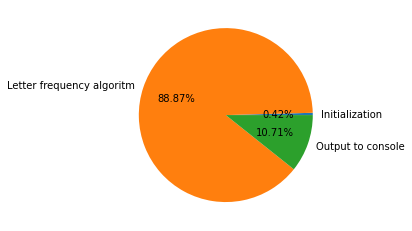

In [9]:
mean_array = [data['init'].sum(), data['tally'].sum(), data['print'].sum()]

plt.figure()
plt.pie(mean_array, labels=['Initialization', 'Letter frequency algoritm', 'Output to console'], autopct='%1.2f%%')
plt.show()

It's visible from this chart that the tally algorithm is accountable for 88.87 % of the execution time. Compared to the 93.4 % from the original we can say 
that the output to console is now closer to the algoritms times, this basicly just means that we've optimized that tally algorithm more than the print_tally method.

# Boxplot
A boxplot is a great way to show benchmark results and compare them later on.

## Boxplot of the three different timings
Here is a boxplot containing all the times in three different boxes, so it's possible to compare the results. The times in the plot are not directly compareable, since they are measuring different parts of the program, it is mostly used to paint a picture of how the times are spread out and show the outliers of this perticular dataset.

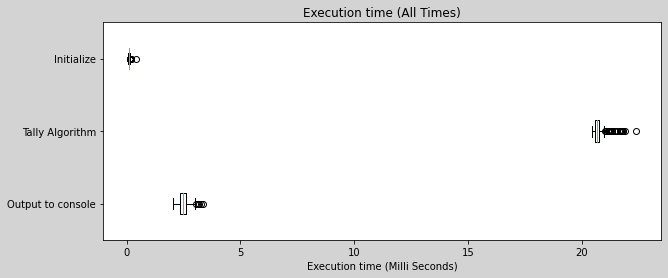

In [10]:
plt.figure(figsize=[10,4],facecolor='lightgray')
plt.boxplot(data, labels=['Initialize', 'Tally Algorithm', 'Output to console'], vert=False, positions=range(4,1,-1))
plt.title("Execution time (All Times)")
plt.xlabel("Execution time (Milli Seconds)")
plt.show()


### Initialize
The initialization is still very fast and very stable, as expected.

### Tally
The tally algorithm has drop down drasticly in execution time, from around 40-41 ms. to now around 21-22 ms. 
A boxplot of just this algoritms times can be found further down in this notebook.

### Output to console
It's visible from the boxplot, that the output algoritm run relatively fast (around 2-3 ms). It's about the same the as before the optimization. We expected more reduction in this part of the program, it could be due to the time actually representing the time it takes to print it in console, and not the actual algoritms runtime. 

# Boxplot of the Tally algoritm

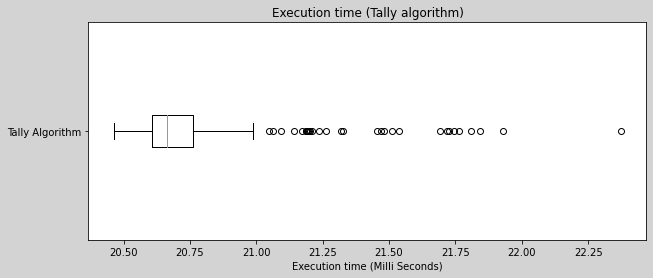

In [16]:
plt.figure(figsize=[10,4],facecolor='lightgray')
plt.boxplot(data['tally'], labels=['Tally Algorithm'], vert=False)
plt.title("Execution time (Tally algorithm)")
plt.xlabel("Execution time (Milli Seconds)")
plt.show()

This is a close up of the most time consuming part of the program. It's clearly visible that the algoritm is much faster than before the optimization. A comparisson will show how much later on.

# Boxplot of the combined times
Underneath is a boxplot of the combined execution times of the 500 runs. 

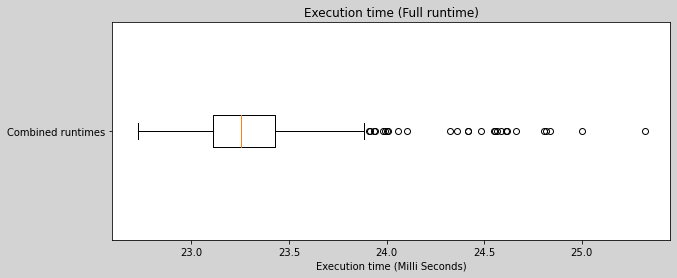

In [17]:
plt.figure(figsize=[10,4],facecolor='lightgray')
plt.boxplot(full_time, labels=['Combined runtimes'], vert=False)
plt.title("Execution time (Full runtime)")
plt.xlabel("Execution time (Milli Seconds)")
plt.show()

Compared quickly to the 41-43 ms we saw before the optimization, these result are much better. It runs much faster, and vary less than it did before. A combined boxplot will show light on how much.

In [18]:
# detecting the outliers for the three times
# Here we are finding the outliers, using the z-score

def detect_outlier(data_1):
    outliers=[]
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

outliers = detect_outlier(data.tally)
print(outliers)
data.tally.sort_values().tail(15)

[21.536, 21.7264, 21.482, 21.5118, 21.8082, 21.6933, 21.7454, 21.8421, 22.3741, 21.4565, 21.4699, 21.7623, 21.7174, 21.9289]


429    21.3263
335    21.4565
408    21.4699
50     21.4820
96     21.5118
7      21.5360
224    21.6933
452    21.7174
30     21.7264
247    21.7454
428    21.7623
119    21.8082
268    21.8421
478    21.9289
315    22.3741
Name: tally, dtype: float64

In [19]:
outliers = detect_outlier(data.init)
print(outliers)
data.init.sort_values().tail(15)

[0.4016, 0.1839, 0.1762, 0.1722]


30     0.1389
182    0.1394
336    0.1400
123    0.1409
140    0.1448
22     0.1537
51     0.1578
119    0.1586
96     0.1587
210    0.1590
97     0.1609
224    0.1722
221    0.1762
24     0.1839
12     0.4016
Name: init, dtype: float64

In [20]:
outliers = detect_outlier(data.print)
print(outliers)
data.print.sort_values().tail(15)

[3.1258, 3.2541, 3.1806, 3.3555]


96     2.9482
369    2.9486
73     2.9501
273    2.9619
224    2.9746
158    2.9765
81     2.9782
69     2.9871
281    3.0160
50     3.0190
119    3.0355
29     3.1258
201    3.1806
140    3.2541
316    3.3555
Name: print, dtype: float64